In [ ]:
# Hypothesis Testing
# 6: Over time, the share of female authors grew

In [1]:
# >>> Preparation
import pandas

In [2]:
print("Importing publications... ")
cols = [
    'key', 
    'pub_cat',
    'pub_type',
    'title',
    'year',
    'authors',
    'n_authors',
    'n_males',
    'n_females',
    'n_unknown',
    'ratio',
    'n_contribs_females',
    'n_contribs_males',
    'n_contribs_unknown',
]

publs = pandas.read_csv("data/publications_cor3.csv", usecols=cols)

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
publs = publs.set_index("key", drop = False)
print("Publications imported. They look like this: {}".format(publs[:5]))

Importing publications... 


C:\Program_Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Publications imported. They look like this:                                                                  key  \
key                                                                    
books/acm/0082477                                  books/acm/0082477   
books/acm/Kim95                                      books/acm/Kim95   
books/acm/kim95/AnnevelinkACFHK95  books/acm/kim95/AnnevelinkACFHK95   
books/acm/kim95/Blakeley95                books/acm/kim95/Blakeley95   
books/acm/kim95/BreitbartGS95          books/acm/kim95/BreitbartGS95   

                                        pub_cat pub_type  \
key                                                        
books/acm/0082477                          book      NaN   
books/acm/Kim95                            book      NaN   
books/acm/kim95/AnnevelinkACFHK95  incollection      NaN   
books/acm/kim95/Blakeley95         incollection      NaN   
books/acm/kim95/BreitbartGS95      incollection      NaN   

                              

In [3]:
# Correlation matrix for relevant years only
# Creation

# Create dataset of publications by year
publs_by_year_group = publs.groupby("year")

# How many publications by year?
publs_sum_by_year = publs_by_year_group.count()

In [8]:
# Find out the minimum and maximum valid year:
min_year = publs_sum_by_year[publs_sum_by_year['key'] > 1000].index.values.min() # 1966
max_year = 2018 # To Adjust: We only have 4 months of 2019 with the dataset of April 2019

In [9]:
publs_lim = publs[(publs['year'] >= min_year) & (publs['year'] <= max_year)]

In [10]:
# Get data
publs_lim_grouped = publs_lim.groupby("year").sum()
publs_lim_grouped["year"] = publs_lim_grouped.index.values.tolist()

In [28]:
publs_lim_grouped["fem_share"] = publs_lim_grouped["n_females"] / publs_lim_grouped["n_authors"] * 100

In [39]:
# >>> Calculation
from scipy import stats
print("Calculating Spearman's Correlation Coefficient...")
publs_lim_cor = stats.spearmanr(publs_lim_grouped["year"], publs_lim_grouped["fem_share"])
print("Done!")
print(publs_lim_cor)
# p value can not be trusted since 53 observations < 500: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html

Calculating Spearman's Correlation Coefficient...
Done!
SpearmanrResult(correlation=0.9781486856958554, pvalue=1.847279166289609e-36)


Text(0.5, 1.0, 'Share of female authors per year (1966 - 2018)')

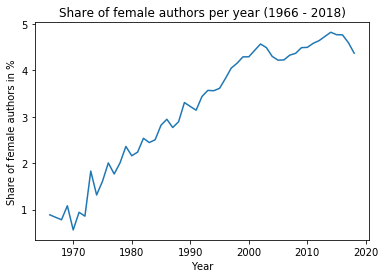

In [40]:
# >>> Visualization
import matplotlib.pyplot as plt
plt.plot(publs_lim_grouped["year"], publs_lim_grouped["fem_share"])
plt.xlabel("Year")
plt.ylabel("Share of female authors in %")
plt.title("Share of female authors per year (1966 - 2018)")

In [ ]:
# >>> Interpretation:


In [ ]:
# >>> Display development of ratio over time

In [ ]:
# How many publications by year?
valid_publs_by_year_group = publs_lim.groupby("year")
valid_publs_sum_by_year = valid_publs_by_year_group.count()

In [ ]:
from statistics import mode, pstdev
valid_ratio_mean_by_year = valid_publs_by_year_group.agg({'ratio':'mean'})
valid_ratio_median_by_year = valid_publs_by_year_group.agg({'ratio':'median'})
valid_ratio_std_by_year = valid_publs_by_year_group.agg({'ratio':pstdev})
#ratio_mode_by_year = valid_publs_by_year_group.agg({'ratio':mode})

In [ ]:
cmap = plt.get_cmap("tab20c")

In [ ]:
# Visualization
#https://matplotlib.org/gallery/api/two_scales.html

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Equality Index')

ax1.plot(valid_ratio_median_by_year.index.values, valid_ratio_median_by_year['ratio'].values, color='g', label="Median Equality Index")
ax1.plot(valid_ratio_mean_by_year.index.values, valid_ratio_mean_by_year['ratio'].values, color='b', label="Mean Equality Index")
ax1.plot(valid_ratio_std_by_year.index.values, valid_ratio_std_by_year['ratio'].values, color='turquoise', label="Standard Deviation of Equality Index")

ax1.tick_params(axis='y')

# set y limits for a subplot: https://stackoverflow.com/questions/15858192/how-to-set-xlim-and-ylim-for-a-subplot-in-matplotlib
ax1.set_ylim([0,55])

plt.legend(loc="center left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Publications')  # we already handled the x-label with ax1
ax2.plot(valid_publs_sum_by_year.index.values, valid_publs_sum_by_year['key'].values, color='r', label="Amount of Publications")
ax2.tick_params(axis='y')

plt.title("Development of Equality Index vs. Amount of Publications")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# How many authors by year?
valid_publs_authors_by_year = valid_publs_by_year_group.agg({'n_authors':'sum'})

In [ ]:
# How many female authors by year?
valid_publs_f_by_year = valid_publs_by_year_group.agg({'n_females':'sum'})

In [ ]:
# How many male authors by year?
valid_publs_m_by_year = valid_publs_by_year_group.agg({'n_males':'sum'})

In [ ]:
# How many unknown authors by year?
valid_publs_u_by_year = valid_publs_by_year_group.agg({'n_unknown':'sum'})

In [ ]:
#https://matplotlib.org/gallery/api/two_scales.html

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Equality Index')

ax1.plot(valid_ratio_median_by_year.index.values, valid_ratio_median_by_year['ratio'].values, color='g', label="Median Equality Index")
ax1.plot(valid_ratio_mean_by_year.index.values, valid_ratio_mean_by_year['ratio'].values, color='b', label="Mean Equality Index")
ax1.plot(valid_ratio_std_by_year.index.values, valid_ratio_std_by_year['ratio'].values, color='turquoise', label="Standard Deviation of Equality Index")

ax1.tick_params(axis='y')

# set y limits for a subplot: https://stackoverflow.com/questions/15858192/how-to-set-xlim-and-ylim-for-a-subplot-in-matplotlib
ax1.set_ylim([0,55])

plt.legend(loc="center left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Authors')  # we already handled the x-label with ax1
ax2.plot(valid_publs_authors_by_year.index.values, valid_publs_authors_by_year['n_authors'].values, color='xkcd:orange', label="Amount of Authors")
ax2.plot(valid_publs_f_by_year.index.values, valid_publs_f_by_year['n_females'].values, color='xkcd:rose', label="Amount of Female Authors")
ax2.plot(valid_publs_m_by_year.index.values, valid_publs_m_by_year['n_males'].values, color='xkcd:peach', label="Amount of Male Authors")
ax2.plot(valid_publs_u_by_year.index.values, valid_publs_u_by_year['n_unknown'].values, color='xkcd:salmon', label="Amount of Authors of Unknown Gender")
ax2.tick_params(axis='y')

plt.title("Development of Equality Index vs. Amount of Authors")
plt.legend(loc="lower left")
plt.show()

In [ ]:
# >>> Evaluation
# The gender equality does not correlate with the year of the publication.
# It stagnates around the same value, looking at median and mean. The std also stays similar. 
# In other words: Yes, we see a slight improvement of the number of female authors, however, the total number of 
# authors also rises, thus the gender equality index does not improve.